In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Appunti/TXA/TXA - the Sloop 🏴‍☠️/FINAL/Notebooks/crossed_dataset.csv')

Mounted at /content/drive


In [ ]:
#import logging

# Configurazione del log
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [5]:
from gensim.models import Word2Vec
import re
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
nltk.download('stopwords')
nltk.download('wordnet')

# Definisci la funzione per la pulizia del testo
def clean_text(text):
    # Rimuovi i commenti tra parentesi quadre
    text = re.sub(r'\[.*?\]', '', text)
    # Rimuovi i caratteri di interruzione di riga
    text = re.sub(r'\n', ' ', text)
    # Rimuovi la punteggiatura
    text = re.sub(r'[^\w\s]', '', text)
    # Converti il testo in minuscolo
    text = text.lower()
    # Tokenize il testo
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    words = w_tokenizer.tokenize(text)
    # Rimuovi le stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    words = [word for word in words if word not in stopwords]
    # Lemmatizza il testo
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

# Esempio di testo tokenizzato
tok_sents = df['lyrics'].apply(clean_text).tolist()

# Addestramento del modello Word2Vec con il testo tokenizzato
w2v_model = Word2Vec(tok_sents, vector_size=100, window=10, min_count=5, sg=1, epochs=20, negative=10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
for index, word in enumerate(w2v_model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(w2v_model.wv.index_to_key)} is {word}")

word #0/26213 is im
word #1/26213 is love
word #2/26213 is dont
word #3/26213 is know
word #4/26213 is like
word #5/26213 is oh
word #6/26213 is get
word #7/26213 is go
word #8/26213 is time
word #9/26213 is youre


In [7]:
similar_words = w2v_model.wv.most_similar("sad")
print(similar_words)


[('bad', 0.697028636932373), ('sadder', 0.6557637453079224), ('ended', 0.6239070892333984), ('maudlin', 0.6112766265869141), ('song', 0.584747850894928), ('lonely', 0.5819066762924194), ('treated', 0.5528054237365723), ('twentythree', 0.5523524880409241), ('itsa', 0.5516740083694458), ('mad', 0.5486620664596558)]


In [8]:
# Definisci una funzione per ottenere i vettori delle parole
def get_word_vectors(text, model):
    words = clean_text(text)  # Applica la funzione di pulizia al testo
    vectors = []
    for word in words:
        if word in model.wv.key_to_index:  # Controlla se la parola è presente nel vocabolario del modello
            vectors.append(model.wv[word])  # Ottieni il vettore della parola dal modello Word2Vec
    return vectors
song_vectors_list = []

# Itera su tutte le canzoni nel dataframe
for song_text in df['lyrics']:
    song_vectors = get_word_vectors(song_text, w2v_model)  # Ottieni i vettori delle parole per ciascuna canzone
    song_vectors_list.append(song_vectors)  # Aggiungi i vettori delle parole della canzone alla lista

# song_vectors_list conterrà una lista di liste, dove ciascuna lista corrisponde ai vettori delle parole di una canzone


In [9]:
# Definiamo le parole chiave associate alle emozioni negative
negative_emotions_keywords = ['sad', 'unhappy', 'depressed', 'miserable', 'gloomy']

# Lista per memorizzare i risultati
similarity_scores = []

# Calcoliamo la similarità tra le parole chiave delle emozioni negative e le parole nei testi delle canzoni per ogni anno
for year in df['year'].unique():
    # Selezioniamo le canzoni per l'anno corrente
    songs_for_year = df[df['year'] == year]['lyrics'].tolist()

    # Calcoliamo la similarità media per l'anno corrente
    total_similarity = 0
    for song in songs_for_year:
        song_words = clean_text(song)
        for keyword in negative_emotions_keywords:
            # Calcoliamo la similarità tra ogni parola chiave e le parole del testo della canzone
            similarity = sum([w2v_model.wv.similarity(keyword, word) for word in song_words if word in w2v_model.wv.index_to_key])
            total_similarity += similarity

    # Calcoliamo la similarità media per le parole chiave delle emozioni negative e le canzoni per l'anno corrente
    average_similarity = total_similarity / (len(songs_for_year) * len(negative_emotions_keywords))

    # Memorizziamo il risultato
    similarity_scores.append((year, average_similarity))

# Stampiamo i risultati
for year, similarity in similarity_scores:
    print(f"Anno {year}: Similarità media = {similarity}")


Anno 2002.0: Similarità media = 27.937976438952806
Anno 2003.0: Similarità media = 27.574032626656912
Anno 2007.0: Similarità media = 28.589981525368014
Anno 2001.0: Similarità media = 27.751188309703
Anno 2004.0: Similarità media = 27.515212908898043
Anno 2016.0: Similarità media = 35.588477745888206
Anno 1995.0: Similarità media = 28.870892387180696
Anno 1999.0: Similarità media = 27.51042412496248
Anno 1981.0: Similarità media = 26.737599902808142
Anno 2010.0: Similarità media = 28.668290149364704
Anno 2000.0: Similarità media = 28.89791310997102
Anno 2006.0: Similarità media = 28.244146465448296
Anno 1988.0: Similarità media = 28.535780718010407
Anno 1964.0: Similarità media = 62.808188457998575
Anno 2014.0: Similarità media = 32.78072817481198
Anno 2009.0: Similarità media = 28.629451867216535
Anno 2008.0: Similarità media = 27.969991067105344
Anno 1998.0: Similarità media = 26.12513732006793
Anno 1994.0: Similarità media = 27.033051332008547
Anno 1997.0: Similarità media = 30.083

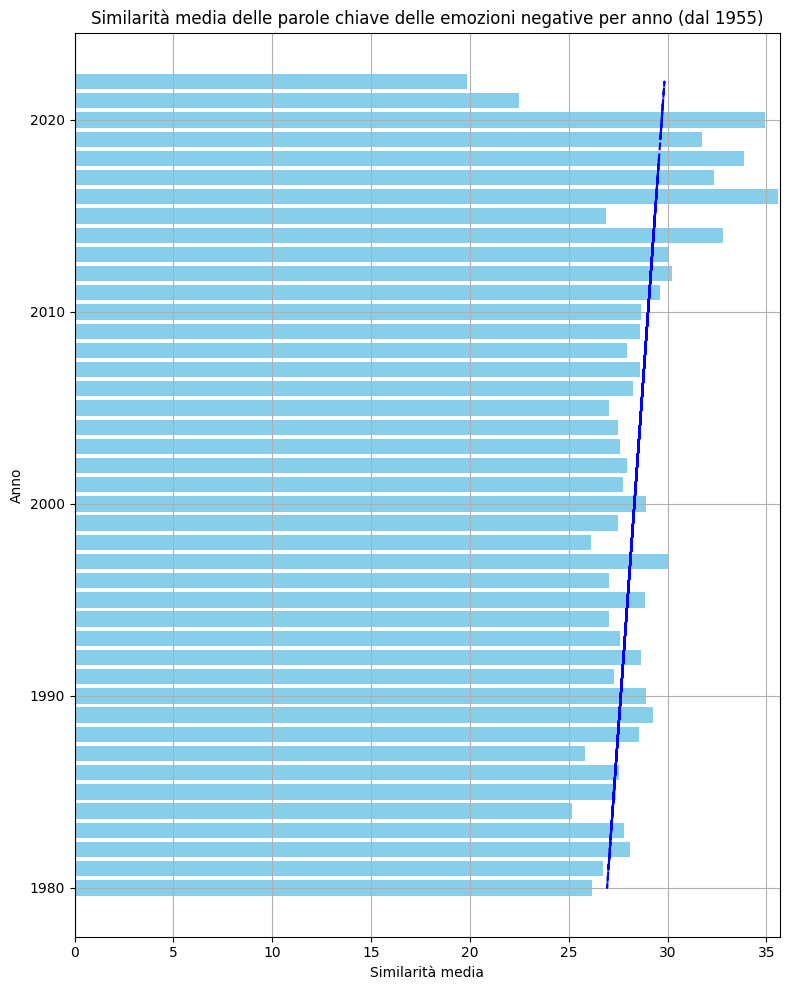

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Filtra i risultati per considerare solo gli anni dal 1955 in poi
filtered_similarity_scores = [result for result in similarity_scores if result[0] >= 1980]
years = [year for year, _ in filtered_similarity_scores]
similarities = [similarity for _, similarity in filtered_similarity_scores]



# Crea il grafico a barre
plt.figure(figsize=(8, 10))
plt.barh(years, similarities, color='skyblue')
plt.title('Similarità media delle parole chiave delle emozioni negative per anno (dal 1955)')
plt.xlabel('Similarità media')
plt.ylabel('Anno')
plt.xlim(0, max(similarities) + 0.1)  # Imposta il limite sull'asse x
plt.grid(axis='x')

# Calcola la linea di tendenza (trend line)
z = np.polyfit(years, similarities, 1)  # Regressione lineare
p = np.poly1d(z)
plt.plot(p(years), years, "b--")  # Linea di tendenza rossa tratteggiata

plt.grid(axis='y')
plt.tight_layout()

# Mostra il grafico
plt.show()


